        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.
        
# Student Name: Sharmila Ray
# Student Id: 1001891656

<h1 align='center' style="color: blue;">Individual Project - Fall 2021</h1>

You need to work on a popular Fashion MNIST dataset for this project. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. You can use all different models that you learned about them in this course for yourr work. Keep in mind that this is a project, not a class assignmnet. So, not all steps are predetermined and you have more flexibility, and the final outcome is likely to be more detailed.

In order to load the dataset you need to have `tensorflow V2` on your computer. Use the following code to install the package

In [1]:
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in c:\users\sharm\anaconda3\lib\site-packages (2.7.0)


You can also check the version of it using the following code.

In [2]:
import tensorflow as tf
tf.__version__

'2.7.0'

Now, it's time to load the dataset

In [3]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [4]:
X_train.shape

(60000, 28, 28)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

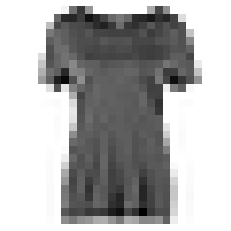

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[10]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [6]:
y_train[10]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [7]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

T-shirt/top


## <span style="color: Blue">Fashion MNIST dataset random 36 image vizualization</span>

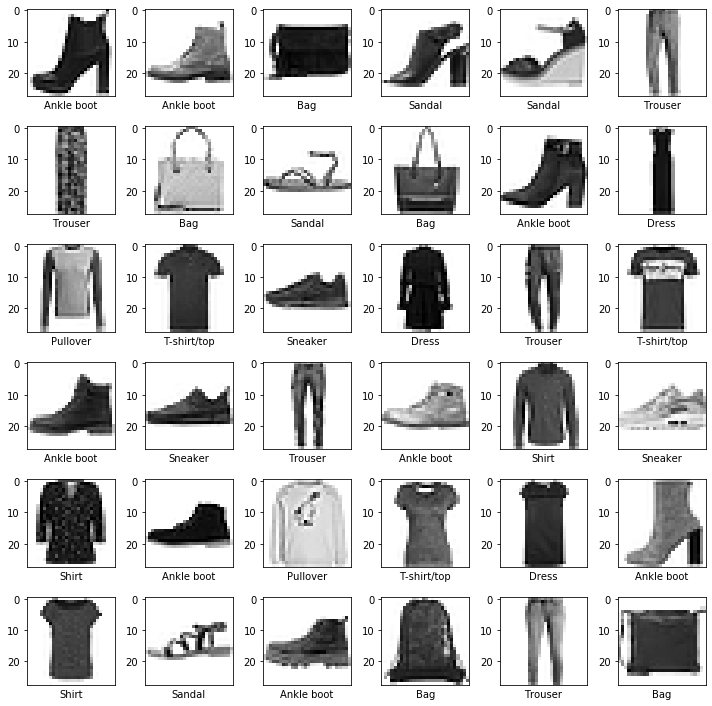

In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt
rows = 6
columns = 6
plt.figure (figsize= (10,10))
for i in range (rows * columns):
    array_a = random.randint(0, len(X_train)+1)
    image = X_train[array_a]
    plt.subplot(rows, columns, i+1)
    plt.xticks([])
    plt.xticks([])
    plt.imshow(image, cmap= plt.cm.binary)
    plt.xlabel(class_names [y_train[array_a]])
    plt.tight_layout()    
plt.show()

## <span style="color: Blue">Preprocessing - normalizing of the dataset and reshaping the image </span>

In [9]:
X_train = X_train/ 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
print(X_train.size,X_train.shape,X_train.ndim)
print(X_test.size,X_test.shape,X_test.ndim)

47040000 (60000, 784) 2
7840000 (10000, 784) 2


## <span style="color: Blue"> Principal Component Analysis for Dimension Reduction </span>

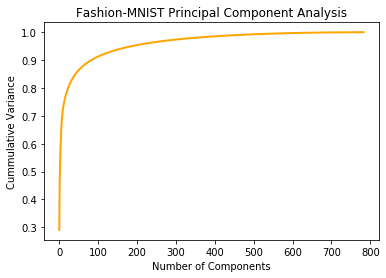

In [10]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_),linewidth=2,color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Variance') 
plt.title('Fashion-MNIST Principal Component Analysis')
plt.show()

## <span style="color: Blue">It is essential to select a relatively small number of components while keeping the effectiveness of the model.Hence, after plotting the curve to find how many number of components are required for capturing maximum variance we find 375 components are explaining the variance.  <br /> Therefore, reshaping the image before model building.  </span>

In [11]:
pca = PCA(n_components=375)
pca.fit(X_train)
Xtrain_pca=pca.transform(X_train)
Xtest_pca = pca.transform(X_test)
print(Xtrain_pca.shape,Xtrain_pca.ndim)
print(Xtest_pca.shape,Xtest_pca.ndim)

(60000, 375) 2
(10000, 375) 2


# <span style="color: Blue">TASK 1 : Using the train set to train various supervised models and evaluate their performance using the test set. <br />  </span>

## <span style="color: brown"> SUPERVISED MODEL 1 : Logistic Regression (With and without PCA and K-Fold Cross Validation ) </span>

In [12]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# Logistic Regression with PCA
logit_model = LogisticRegression(solver = 'liblinear') # using the default liblinear parameter for multiclass problems
logit_model.fit(Xtrain_pca, y_train)
y_test_hat_logit = logit_model.predict(Xtest_pca)
accur_logit = accuracy_score(y_test,y_test_hat_logit, normalize = True) * 100
print("The accuracy of Logistic Regression with PCA is:{:.2f}".format(accur_logit)) 
print ()
print ()
# Classification Report for Logistic Regression with PCA
print (classification_report(y_test,y_test_hat_logit))
print ()
# AUC score for Logistic Regression with PCA
roc_logit = roc_auc_score(y_test,logit_model.predict_proba(Xtest_pca), multi_class="ovr", average="macro")
print("AUC score of Logistic Regression with PCA is:{:.2f}".format(roc_logit))

The accuracy of Logistic Regression with PCA is:84.17


              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1000
           1       0.97      0.96      0.96      1000
           2       0.73      0.73      0.73      1000
           3       0.83      0.87      0.85      1000
           4       0.73      0.77      0.75      1000
           5       0.94      0.91      0.93      1000
           6       0.64      0.54      0.59      1000
           7       0.89      0.94      0.92      1000
           8       0.91      0.94      0.93      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000


AUC score of Logistic Regression with PCA is:0.98


In [13]:
# Logistic Regression without PCA
logit_model = LogisticRegression(solver = 'liblinear')
logit_model.fit(X_train, y_train)
y_test_hat_logit = logit_model.predict(X_test)
accur_logit = accuracy_score(y_test,y_test_hat_logit, normalize = True) * 100
print("The accuracy of Logistic Regression is:", accur_logit) 
print ()
print ()
# Classification Report for Logistic Regression without PCA
print (classification_report(y_test,y_test_hat_logit))
print ()
# AUC score for Logistic Regression without PCA
roc_logit = roc_auc_score(y_test,logit_model.predict_proba(X_test), multi_class="ovr", average="macro")
print("AUC score of Logistic Regression is:{:.2f}".format(roc_logit))

The accuracy of Logistic Regression is: 84.11


              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       0.97      0.95      0.96      1000
           2       0.72      0.73      0.73      1000
           3       0.82      0.87      0.84      1000
           4       0.72      0.76      0.74      1000
           5       0.94      0.92      0.93      1000
           6       0.64      0.54      0.59      1000
           7       0.90      0.94      0.92      1000
           8       0.93      0.95      0.94      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000


AUC score of Logistic Regression is:0.98


### <span style="color: brown"> Using cross-validation to tune model hyperparameters with and without PCA </span>

In [14]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score 
# Mean Accuracy for Logistic Regression using K fold cross validation with all features
logit_model = LogisticRegression(solver='liblinear')
accuracy_logit = cross_val_score(logit_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross Validation Scores for Logistic Regression is:",accuracy_logit)
print("Mean Accuracy Score for Logistic Regression is: {:.2f}".format(np.mean(accuracy_logit)))
# Using StratifiedKFold partitioning with alL features
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
scoring = {'precision': make_scorer(precision_score, average='micro'), 
           'recall': make_scorer(recall_score, average='micro'),
           'f1':make_scorer(f1_score, average='weighted')}
scores = cross_validate(logit_model,  X_train, y_train, scoring=scoring, cv=cv,return_train_score=False)
print("Mean Precision Score for Logistic Regression is: {:.2f}".format(np.mean(scores['test_precision'])))
print("Mean Recall Score for Logistic Regression is: {:.2f}".format(np.mean(scores['test_recall'])))
print("Mean F-1 Score for Logistic Regression is: {:.2f}".format(np.mean(scores['test_f1'])))

Cross Validation Scores for Logistic Regression is: [0.85225    0.847      0.85641667 0.85633333 0.85183333]
Mean Accuracy Score for Logistic Regression is: 0.85
Mean Precision Score for Logistic Regression is: 0.85
Mean Recall Score for Logistic Regression is: 0.85
Mean F-1 Score for Logistic Regression is: 0.85


In [15]:
# Mean Accuracy for Logistic Regression using K fold cross validation with PCA
logit_model = LogisticRegression(solver='liblinear')
accuracy_logit = cross_val_score(logit_model, Xtrain_pca, y_train, cv=5, scoring='accuracy')
print("Cross Validation Scores for Logistic Regression with PCA is:",accuracy_logit)
print("Mean Accuracy Score for Logistic Regression with PCA is: {:.2f}".format(np.mean(accuracy_logit)))
# Using StratifiedKFold partitioning with PCA
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
scoring = {'precision': make_scorer(precision_score, average='micro'), 
           'recall': make_scorer(recall_score, average='micro'),
           'f1':make_scorer(f1_score, average='weighted')}
scores = cross_validate(logit_model,  Xtrain_pca, y_train, scoring=scoring, cv=cv,return_train_score=False)
print("Mean Precision Score for Logistic Regression with PCA is: {:.2f}".format(np.mean(scores['test_precision'])))
print("Mean Recall Score for Logistic Regression with PCA is: {:.2f}".format(np.mean(scores['test_recall'])))
print("Mean F-1 Score for Logistic Regression with PCA is: {:.2f}".format(np.mean(scores['test_f1'])))

Cross Validation Scores for Logistic Regression with PCA is: [0.85558333 0.84858333 0.85833333 0.85675    0.85325   ]
Mean Accuracy Score for Logistic Regression with PCA is: 0.85
Mean Precision Score for Logistic Regression with PCA is: 0.85
Mean Recall Score for Logistic Regression with PCA is: 0.85
Mean F-1 Score for Logistic Regression with PCA is: 0.85


#### <span style="color: brown"> RESULT (With PCA) : Logistic Regression Accuracy : 84% <br /><br />Logistic Regression Precision: Class 1  has highest<br /> <br />Logistic Regression Recall: Class 1 has highest <br /> <br /> Logistic Regression F1 Score: Class 1 has highest <br /> <br /> Logistic Regression AUC Score: 98% <br />  <br /> Logistic Regression Mean Accuracy Score using K-FoldCross validation: 85% <br /> <br /> INTERPRETATION : From the above Logistic Regression model building we notice that with K-fold Cross Validation post-PCA used for feature or component selection matches the performance of the full image size of 784 pixels.Hence we conclude that we can use the 375 pixels PCA features for our model bulding.  </span>

## <span style="color: brown"> SUPERVISED MODEL 2 : K-Nearest Neighbor on PCA selected features </span>

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

KN3 = KNeighborsClassifier(n_neighbors=3)
KN3.fit(Xtrain_pca, y_train)
y_KN3_hat = KN3.predict(Xtest_pca)
KNacc_3 = accuracy_score(y_test,y_KN3_hat, normalize = True) * 100 
print("The Accuracy for KNN with 3 Neighbors is {:.2f}".format(KNacc_3))

KN5 = KNeighborsClassifier(n_neighbors=5)
KN5.fit(Xtrain_pca, y_train)
y_KN5_hat = KN5.predict(Xtest_pca)
KNacc_5 = accuracy_score(y_test,y_KN5_hat, normalize = True) * 100 
print("The Accuracy for KNN with 5 Neighbors is {:.2f}".format(KNacc_5))

KN7 = KNeighborsClassifier(n_neighbors=7)
KN7.fit(Xtrain_pca, y_train)
y_KN7_hat = KN7.predict(Xtest_pca)
KNacc_7 = accuracy_score(y_test,y_KN7_hat, normalize = True) * 100 
print("The Accuracy for KNN with 7 Neighbors is {:.2f}".format(KNacc_7))
print()
#Classification Report for KNeighborClassifier Model with PCA for 3 Nearest Neighbor
print (classification_report(y_test,y_KN3_hat))

The Accuracy for KNN with 3 Neighbors is 85.81
The Accuracy for KNN with 5 Neighbors is 85.81
The Accuracy for KNN with 7 Neighbors is 85.76

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1000
           1       0.98      0.97      0.98      1000
           2       0.72      0.80      0.76      1000
           3       0.91      0.85      0.88      1000
           4       0.80      0.75      0.77      1000
           5       0.99      0.85      0.92      1000
           6       0.66      0.60      0.63      1000
           7       0.90      0.96      0.93      1000
           8       0.98      0.96      0.97      1000
           9       0.90      0.97      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



#### <span style="color: brown">  INTERPRETATION : From the above KNN model building we notice that the accuracy score of K-3 is the best.  </span>

In [17]:
# Precision, Recall, F1 Score and AUC Score of KNN K-3 
knn_prec = metrics.precision_score(y_test, y_KN3_hat, average='macro')
print("The Precision for KNN with 3 Neighbors is: {:.2f}".format(knn_prec))
print()
knn_rec = metrics.recall_score(y_test, y_KN3_hat, average='macro')
print("The Recall for KNN with 3 Neighbors is: {:.2f}".format(knn_rec))
print()
knn_f1 = metrics.f1_score(y_test, y_KN3_hat, average= "weighted")
print("F1 score for KNN with 3 Neighbors is: {:.2f}".format(knn_f1))
print()
knn_auc=roc_auc_score(y_test,KN3.predict_proba(Xtest_pca), multi_class='ovr', average='macro')
print("AUC Score for KNN with 3 Neighbors is:{:.2f}".format(knn_auc))

The Precision for KNN with 3 Neighbors is: 0.86

The Recall for KNN with 3 Neighbors is: 0.86

F1 score for KNN with 3 Neighbors is: 0.86

AUC Score for KNN with 3 Neighbors is:0.96


#### <span style="color: brown"> RESULT (With PCA) : KNN Accuracy for K-3  : 85.83% <br /> <br /> KNN Precision for K-3 : 86% <br /> <br /> KNN Recall for K-3 : 86%  <br /> <br /> KNN F1 Score for K-3 : 86% <br /> <br /> KNN AUC Score for K-3 : 96% <br /> <br /> INTERPRETATION : From the above KNN model building we notice that the AUC Score of K-3 is not as good as the AUC Score of Logistic Regression. </span>

## <span style="color: brown"> SUPERVISED MODEL 3 : SVM on PCA selected features and 3 hyperparameter </span>

In [18]:
from sklearn.svm import SVC
from sklearn import metrics

svm_model = SVC(kernel='linear', gamma="auto", C=1)
svm_model.fit(Xtrain_pca, y_train)
y_test_hat_svm = svm_model.predict(Xtest_pca)
accur_svm = metrics.accuracy_score(y_test, y_test_hat_svm)*100
print("The Accuracy of SVM is:", accur_svm)
print()
print (classification_report(y_test,y_test_hat_svm))
print()
svm_prec = metrics.precision_score(y_test, y_test_hat_svm, average='macro')
print("The Precision of SVM is: {:.2f}".format(svm_prec))
print()
svm_rec = metrics.recall_score(y_test, y_test_hat_svm, average='macro')
print("The Recall of SVM is: {:.2f}".format(svm_rec))
print()
svm_f1 = metrics.f1_score(y_test, y_test_hat_svm, average= 'weighted')
print("The F1 score of SVM is: {:.2f}".format(svm_f1))
print()

The Accuracy of SVM is: 84.94

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.97      0.96      0.97      1000
           2       0.74      0.78      0.76      1000
           3       0.84      0.85      0.84      1000
           4       0.76      0.76      0.76      1000
           5       0.94      0.93      0.94      1000
           6       0.65      0.57      0.61      1000
           7       0.91      0.94      0.92      1000
           8       0.95      0.93      0.94      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


The Precision of SVM is: 0.85

The Recall of SVM is: 0.85

The F1 score of SVM is: 0.85



#### <span style="color: brown"> RESULT (With PCA) : SVM Accuracy : 84.94% <br /> <br /> SVM Precision : 85% <br /> <br /> SVM Recall : 85% <br /> <br />SVM F1 Score : 85% <br /> <br /> INTERPRETATION : From the above SVM model building we notice that the accuracy of SVM is slighthly better than the Accuracy of Logistic Regression. Yet KNN has better Accuracy than SVM. </span>

## <span style="color: brown"> SUPERVISED MODEL 4 : Decision Tree Classifier using Grid Search on PCA selected features with Gini Index best splitting criterion and parameter </span>

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
DT_Model = DecisionTreeClassifier()
param_grid = {'max_depth': [10,20,30,40,50]}   
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(DT_Model, param_grid, cv = cv, scoring = 'accuracy')
grid.fit(Xtrain_pca, y_train)
print("The best Parameter is: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

The best Parameter is: {'max_depth': 20}
Best Cross Vlidation Score: 0.7606166666666667


#### <span style="color: brown">  INTERPRETATION : From the above DecisionTree Classifier model building grid search method we notice that the best parameter of max-depth for the decision tree is 20 to train the model. </span>

In [20]:
dt_1 = DecisionTreeClassifier(criterion='gini', max_depth=20)  
dt_1.fit(Xtrain_pca, y_train)
y_dt1_hat= dt_1.predict(Xtest_pca)
accur_tree = metrics.accuracy_score(y_test, y_dt1_hat)*100         
print("The Accuracy of Decision Tree Classifier is: {}".format(accur_tree))
print()
print(classification_report(y_test, y_dt1_hat))
print()
prec_tree = metrics.precision_score(y_test, y_dt1_hat, average='macro')
print("The Precision of Decision Tree Classifier is: {:.2f}".format(prec_tree))
print()
rec_tree = metrics.recall_score(y_test, y_dt1_hat, average='macro')
print("The Recall of Decision Tree Classifier is: {:.2f}".format(rec_tree))
print()
f1_tree = metrics.f1_score(y_test, y_dt1_hat, average= "weighted") 
print("F1 score of Decision Tree Classifier is: {:.2f}".format(f1_tree))

The Accuracy of Decision Tree Classifier is: 76.53999999999999

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1000
           1       0.95      0.93      0.94      1000
           2       0.62      0.66      0.64      1000
           3       0.79      0.78      0.79      1000
           4       0.64      0.64      0.64      1000
           5       0.84      0.83      0.84      1000
           6       0.50      0.48      0.49      1000
           7       0.83      0.84      0.83      1000
           8       0.89      0.87      0.88      1000
           9       0.88      0.88      0.88      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000


The Precision of Decision Tree Classifier is: 0.77

The Recall of Decision Tree Classifier is: 0.77

F1 score of Decision Tree Classifier is: 0.77


#### <span style="color: brown"> Receiver operating characteristic / ROC-Curve Analysis of DecisionTree Classifier  </span>

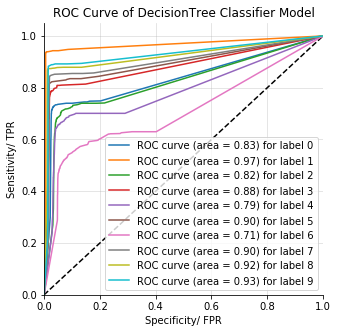

In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import seaborn as sns
import pandas as pd
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
# ROC curve classification metric for DecisionTree Classifier
def plot_dt_roc(clf, Xtest_pca, y_test, classes, figsize=(15, 5)):
    y_score = dt_1.fit(Xtrain_pca, y_train).predict_proba(Xtest_pca)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Specificity/ FPR')
    ax.set_ylabel('Sensitivity/ TPR')
    ax.set_title('ROC Curve of DecisionTree Classifier Model')
    for i in range(classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="lower right")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()
roc_curve = plot_dt_roc(Pipeline, Xtest_pca, y_test, classes=10, figsize=(5, 5))

#### <span style="color: brown"> RESULT (With PCA) : DecisionTree Classifier Accuracy : 76% <br /> <br />DecisionTree Classifier Precision : 76% <br /> <br /> DecisionTree Classifier Recall : 76% <br /> <br />DecisionTree Classifier F1 Score : 76% <br /> <br /> DecisionTree Classifier ROC Curve : Most of the labels are closer to the top left corner indicating better performance with label 1 performing the best.  <br /> <br /> INTERPRETATION : From the above DecisionTree Classifier model building we notice that the accuracy of the model is lower than the other 3 models build previously. </span>

#### <span style="color: brown"> Cross-validation method on DecisionTree Classifier Model all features (A comparison between PCA selected features and all features in DecisionTree Classifier Model) </span>

In [22]:
from sklearn.model_selection import cross_val_score                
a=cross_val_score(dt_1, X_train, y_train, cv=3, scoring="accuracy")
print("Mean Accuracy Score of DecisionTree Classifier is: {}".format(np.mean(a)))
print()

Mean Accuracy Score of DecisionTree Classifier is: 0.7955166666666668



## <span style="color: brown"> SUPERVISED MODEL 5 : RandomForest Classifier on PCA selected features with hyperparameters - tree depth and estimators </span>

In [23]:
from sklearn.ensemble import RandomForestClassifier
ran_f = RandomForestClassifier(criterion='gini', max_depth=35, n_estimators=100) 
ran_f.fit(Xtrain_pca, y_train)
y_rf_hat  = ran_f.predict(Xtest_pca)
accur_rf = accuracy_score(y_test,y_rf_hat, normalize = True) * 100
print("The Accuracy of RandomForest Classifier is:", accur_rf)
print()
print (classification_report(y_test,y_rf_hat))
print()
prec_rf = metrics.precision_score(y_test, y_rf_hat, average='macro')
print("The Precision of RandomForest Classifier is: {:.2f}".format(prec_rf))
print()
rec_rf = metrics.recall_score(y_test, y_rf_hat, average='macro')
print("The Recall of RandomForest Classifier is: {:.2f}".format(rec_rf))
print()
f1_rf = metrics.f1_score(y_test,y_rf_hat, average= "weighted") 
print("F1 score of RandomForest Classifier is: {:.2f}".format(f1_rf))

The Accuracy of RandomForest Classifier is: 84.98

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1000
           1       1.00      0.95      0.97      1000
           2       0.73      0.78      0.75      1000
           3       0.85      0.88      0.86      1000
           4       0.76      0.78      0.77      1000
           5       0.92      0.92      0.92      1000
           6       0.68      0.53      0.59      1000
           7       0.93      0.92      0.92      1000
           8       0.91      0.95      0.93      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


The Precision of RandomForest Classifier is: 0.85

The Recall of RandomForest Classifier is: 0.85

F1 score of RandomForest Classifier is: 0.85


#### <span style="color: brown"> Receiver operating characteristic / ROC-Curve Analysis of RandomForest Classifier  </span>

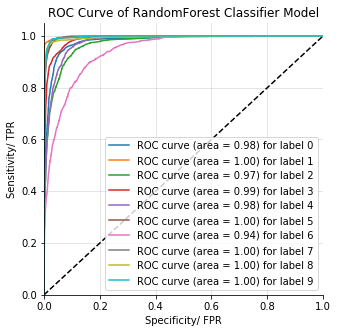

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.pipeline import Pipeline
# ROC curve classification metric for RandomForest Classifier
def plot_rf_roc(clf, Xtest_pca, y_test, classes, figsize=(15,5)):
    y_score = ran_f.fit(Xtrain_pca, y_train).predict_proba(Xtest_pca)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Specificity/ FPR')
    ax.set_ylabel('Sensitivity/ TPR')
    ax.set_title('ROC Curve of RandomForest Classifier Model')
    for i in range(classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="lower right")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()
rf_curve = plot_rf_roc(Pipeline, Xtest_pca, y_test,classes=10, figsize=(5,5))

#### <span style="color: brown"> RESULT (With PCA) : RandomForest Classifier Accuracy : 85.11% <br /> <br /> RandomForest Classifier Precision : 85% <br /> <br /> RandomForest Classifier Recall : 85% <br /> <br /> RandomForest F1 Score : 85% <br /> <br /> RandomForest ROC Curve : All of the labels are closer to the top left corner indicating better performance with label 1, 5,7,8 and 9 performing the best.  <br /> <br /> INTERPRETATION : From the above RandomForest Classifier model building we notice that the accuracy of the model is slightly better than most of the  models built previously and significantly better than DecisionTree Classifier Model. Yet, KNN remains the best in Accuracy.  </span>

## <span style="color: brown"> SUPERVISED MODEL 6 : Neural Networks on PCA selected features </span>

In [90]:
from sklearn.neural_network import MLPClassifier
nk = MLPClassifier(hidden_layer_sizes=(150,100,50), activation='relu', solver='adam', max_iter=300)
nk.fit(Xtrain_pca, y_train)
y_nk_hat = nk.predict(Xtest_pca)
accur_nk = metrics.accuracy_score(y_test, y_nk_hat)*100
print("The Accuracy of Neural Networks is:", accur_nk)
print()
print (classification_report(y_test,y_nk_hat))
print()
prec_nk = metrics.precision_score(y_test, y_nk_hat, average='macro')
print("The Precision of Neural Networks is: {:.2f}".format(prec_nk))
print()
rec_nk = metrics.recall_score(y_test, y_nk_hat, average='macro')
print("The Recall of Neural Networks is: {:.2f}".format(rec_nk))
print()
f1_nk = metrics.f1_score(y_test, y_nk_hat, average= "weighted") 
print("F1 score of Neural Networks is: {:.2f}".format(f1_nk))
print()
auc_nk =roc_auc_score(y_test,nk.predict_proba(Xtest_pca), multi_class='ovr', average='macro')
print("AUC Score of Neural Networks is:{:.2f}".format(auc_nk))

The Accuracy of Neural Networks is: 88.19

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1000
           1       0.98      0.97      0.98      1000
           2       0.81      0.82      0.81      1000
           3       0.87      0.88      0.87      1000
           4       0.81      0.83      0.82      1000
           5       0.97      0.96      0.96      1000
           6       0.70      0.67      0.68      1000
           7       0.94      0.95      0.95      1000
           8       0.96      0.96      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


The Precision of Neural Networks is: 0.88

The Recall of Neural Networks is: 0.88

F1 score of Neural Networks is: 0.88

AUC Score of Neural Networks is:0.99


#### <span style="color: brown"> RESULT (With PCA) : Neural Networks Accuracy : 88.19% <br /> <br /> Neural Networks Precision : 88% <br /> <br /> Neural Networks Recall : 88% <br /> <br /> Neural Networks F1 Score : 88% <br /> <br /> Neural Networks AUC Score : 99% <br /> <br /> INTERPRETATION : From the above Neural Networks model building we notice that the accuracy of the model is the best so far compared to all the models built previously and the AUC Score is 99% which is excellent.  </span>

# <span style="color: cyan2 "> Innovative Extra </span>
## <span style="color: brown"> SUPERVISED MODEL 7 : Convolution Neural Networks (CNN) on all features </span>

In [58]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
#from keras.optimizers import SGD, RMSprop, Adadelta, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

input_shape = (28, 28, 1)

# Reshape the inputs
X_train_cnn = X_train.reshape(60000,28,28,1)
x_test_cn = X_test.reshape(10000,28,28,1)

# Split training data into training and validation sets
x_train_cn, x_validation_cn, y_train_cn, y_validation_cn = train_test_split(X_train_cnn, y_train, test_size=0.2, random_state=13)

# Convert lables to categorical
y_train_cn  = keras.utils.to_categorical(y_train_cn, 10)
y_validation_cn = keras.utils.to_categorical(y_validation_cn, 10)
y_test_cn = keras.utils.to_categorical(y_test, 10)

### CNN Model building
model = Sequential()

## Add the first convolutional layer with 32 filters each of size 3x3, with RELU activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# Use MaxPooling to choose the best features
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropout to randomly turn neurons on and off. Improves convergence
model.add(Dropout(0.25))

## Add another intermediate convolutional layer with 64 filters each of size 3x3, with RELU activation
model.add(Conv2D(64, (3, 3), activation='relu'))
# Use MaxPooling to choose the best features
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropout to randomly turn neurons on and off. Improves convergence
model.add(Dropout(0.25))

## Add another intermediate convolutional layer with 128 filters each of size 3x3, with RELU activation
model.add(Conv2D(128, (3, 3), activation='relu'))
# Use MaxPooling to choose the best features
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropout to randomly turn neurons on and off. Improves convergence
model.add(Dropout(0.25))

## Flatten to model as we want a classification output
model.add(Flatten())

## Finally add the last fully connected layer to get all relevant data
model.add(Dense(2056, activation='relu'))
# Add dropout to randomly turn neurons on and off. Improves convergence
model.add(Dropout(0.3))
# use softmax activation to get the output probabilities
model.add(Dense(10, activation='softmax'))

## Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

batch_size = 32
num_epoch = 10

## Train the model
model_log = model.fit(x_train_cn, y_train_cn,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_validation_cn, y_validation_cn))

predictions = model.predict(x_test_cn)
print('np.shape(predictions))',np.shape(predictions))

Epoch 1/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.6908 - accuracy: 0.7379 - val_loss: 0.4751 - val_accuracy: 0.8251
Epoch 2/10
1500/1500 [==============================] - 26s 18ms/step - loss: 0.4857 - accuracy: 0.8204 - val_loss: 0.4112 - val_accuracy: 0.8486
Epoch 3/10
1500/1500 [==============================] - 26s 18ms/step - loss: 0.4269 - accuracy: 0.8425 - val_loss: 0.3709 - val_accuracy: 0.8617
Epoch 4/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.4031 - accuracy: 0.8511 - val_loss: 0.3591 - val_accuracy: 0.8690
Epoch 5/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.3830 - accuracy: 0.8570 - val_loss: 0.3331 - val_accuracy: 0.8754
Epoch 6/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3712 - accuracy: 0.8619 - val_loss: 0.3753 - val_accuracy: 0.8595
Epoch 7/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.3617 - accuracy: 0.8661 - val_loss: 0.3148 -

In [67]:
import random
for i in random.sample(range(0,10000),10):
    
    actual_labels = []
    predicted_labels = []

    actual_labels.append(np.argmax(y_test_cn[i]))
    predicted_labels.append(np.argmax(predictions[i]))
        
    print("Actual labels: {}".format(actual_labels))
    print("Predicted labels: {}\n".format(predicted_labels))
    print("predictions[i]: {}".format(predictions[i]))

Actual labels: [6]
Predicted labels: [6]

predictions[i]: [2.9676965e-01 1.0230072e-02 3.0253023e-02 2.4823870e-01 1.1220355e-02
 6.1244698e-04 3.8299540e-01 8.3766201e-05 1.9194296e-02 4.0228048e-04]
Actual labels: [9]
Predicted labels: [9]

predictions[i]: [3.2742064e-06 3.7981021e-08 8.5598245e-08 2.9984963e-07 3.9599482e-07
 4.5052811e-04 7.8859398e-07 8.5407861e-02 1.2775510e-06 9.1413546e-01]
Actual labels: [1]
Predicted labels: [1]

predictions[i]: [1.7981455e-11 1.0000000e+00 7.2498826e-12 2.5046829e-10 4.8010467e-12
 3.8387124e-18 9.9433094e-11 1.5938849e-24 1.4976224e-12 1.9023967e-18]
Actual labels: [6]
Predicted labels: [6]

predictions[i]: [2.91065842e-01 5.32884733e-04 2.01979303e-03 5.49531430e-02
 2.49911379e-03 4.66586498e-05 6.48186803e-01 4.45771639e-06
 5.69494150e-04 1.21826524e-04]
Actual labels: [9]
Predicted labels: [9]

predictions[i]: [3.86919297e-08 2.26570665e-10 4.94681462e-10 2.02812234e-09
 4.56513005e-09 7.74928703e-05 1.12544534e-08 1.10053532e-02
 1.03

In [68]:
score = model.evaluate(x_test_cn, y_test_cn, verbose=0)
print("The Accuracy of CNN is: {:.2f}".format(score[1]))

The Accuracy of CNN is: 0.88


#### <span style="color: brown"> RESULT (With PCA) : CNN Accuracy : 88% <br /> <br /> INTERPRETATION : From the above CNN model building we notice that the accuracy of the model is similar to the Neural Network model built previously.Yet, Neural Network is slightly better than CNN. </span>

## <span style="color: brown"> MODEL COMPARISON </span>

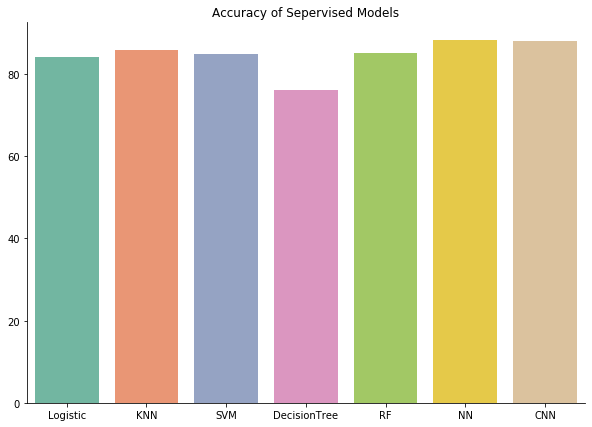

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
model_names =['Logistic','KNN', 'SVM','DecisionTree','RF','NN','CNN']
model_accuracy = [84.13, 85.83, 84.94, 76.03, 85.11, 88.19, 88.0]
fig, axes = plt.subplots(1,1,figsize=(10,7))
sns.barplot(x=model_names,y=model_accuracy,palette='Set2').set_title("Accuracy of Sepervised Models")
sns.despine()
plt.show()

## <span style="color: Coral"> OVERALL INTERPRETATION : From all the models built to train the data set and predict, the best so far are CNN Model with 88% accuracy and Neural Networks Model with 88.19% accuracy and 99% AUC Score. Hence, we should pick Neural Networks as the best model to train our own fashion peices and for prediction.</span>

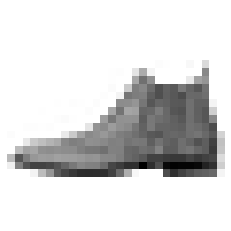

The Predicted label of the above image is: Ankle boot


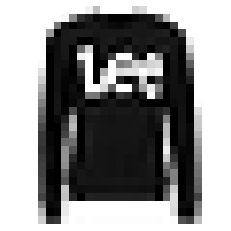

The Predicted label of the above image is: Pullover


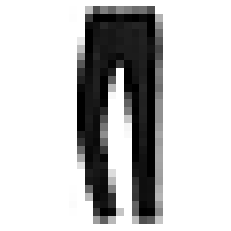

The Predicted label of the above image is: Trouser


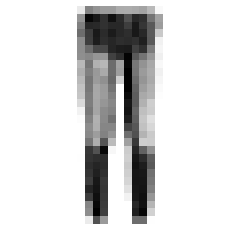

The Predicted label of the above image is: Trouser


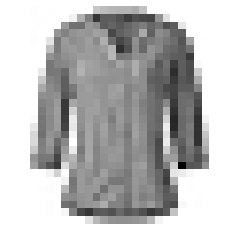

The Predicted label of the above image is: T-shirt/top


In [115]:
# Running a test, taking 5 images to check the prediction power of the Neural Networks model
i=1
for i in range(5):
    nlp =X_test[i]
    nlp_nk =nlp.reshape(28,28)
    plt.imshow(nlp_nk,cmap= plt.cm.binary)
    plt.axis('off')
    plt.show()
    y_pred=y_nk_hat[i]   
    print("The Predicted label of the above image is:", class_names[y_pred])  
    i=i+1

# <span style="color: Blue">TASK 2 : Using the best models to predict my own fashion pieces. <br />  </span>

In [156]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [157]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


## <span style="color: darkmagenta"> Image reading  </span>

(1807, 1807, 3)
(1902, 1902, 3)
(1836, 1836, 3)
(1904, 1905, 3)
(1907, 1908, 3)


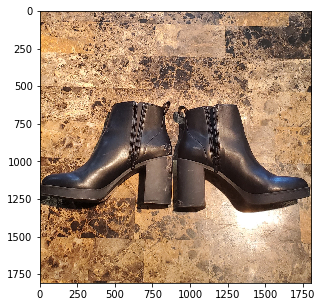

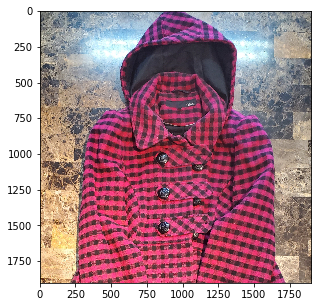

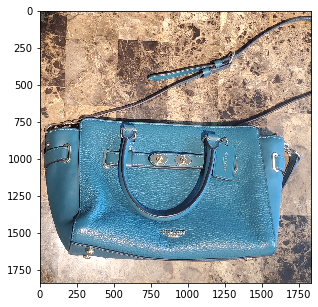

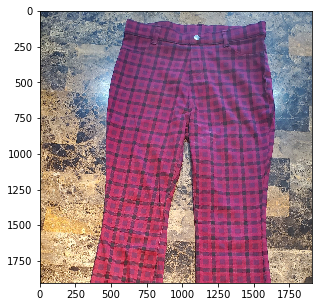

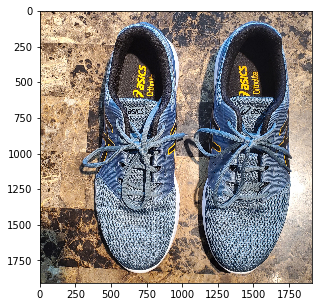

In [158]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import glob               
from skimage import color  
from skimage import io
import cv2  
%matplotlib inline

boots=np.array(mpimg.imread("AnkleHighBoots.jpg"))
fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(boots)
print(boots.shape)
coat=np.array(mpimg.imread("Coat.jpg"))
fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(coat)
print(coat.shape)
bag=np.array(mpimg.imread("HandBag.jpg"))
fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(bag)
print(bag.shape)
pants=np.array(mpimg.imread("Pants.jpg"))
fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(pants)
print(pants.shape)
sneakers=np.array(mpimg.imread("Sneakers.jpg"))
fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(sneakers)
print(sneakers.shape)

## <span style="color: darkmagenta"> Reshaping and resizing images to store in a new folder </span>

In [159]:
img_list=[]
res_img=[]   
for file in glob.glob("./*.jpg"):
    org = Image.open(file)
    img_list.append(org)   
for pic in img_list:
    pic.show()
    pic = pic.resize((28,28))          
    res_img.append(pic)   
for (i,j) in enumerate (res_img):
    j.save('{}{}{}'.format('./ReshapedImages/pic',i+1,'.jpg'))

In [160]:
pic1=np.array(mpimg.imread("ReshapedImages/pic1.jpg"))
pic2=np.array(mpimg.imread("ReshapedImages/pic2.jpg"))
pic3=np.array(mpimg.imread("ReshapedImages/pic3.jpg"))
pic4=np.array(mpimg.imread("ReshapedImages/pic4.jpg"))
pic5=np.array(mpimg.imread("ReshapedImages/pic5.jpg"))

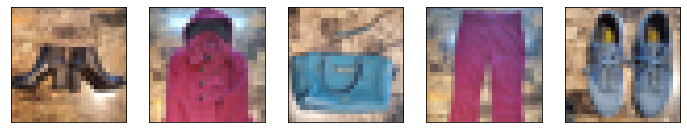

In [161]:
fig, ax=plt.subplots(1,5,figsize=(12,15))
for i, axi in enumerate(ax.flat):
    axi.imshow(res_img[i], cmap='binary')
    axi.set(xticks=[],yticks=[])

## <span style="color: darkmagenta"> Converting images into grayscale </span>

In [162]:
gs1 = color.rgb2gray(io.imread('ReshapedImages/pic1.jpg'))
gs2 = color.rgb2gray(io.imread('ReshapedImages/pic2.jpg'))
gs3 = color.rgb2gray(io.imread('ReshapedImages/pic3.jpg'))
gs4 = color.rgb2gray(io.imread('ReshapedImages/pic4.jpg'))
gs5 = color.rgb2gray(io.imread('ReshapedImages/pic5.jpg'))

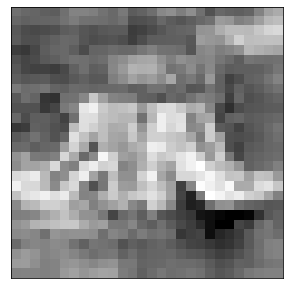

(28, 28)

In [163]:
fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(gs1, cmap=plt.cm.binary)
ax.set(xticks=[], yticks=[])
plt.show()
gs1.shape

## <span style="color: darkmagenta"> Visualizing images side by side </span>

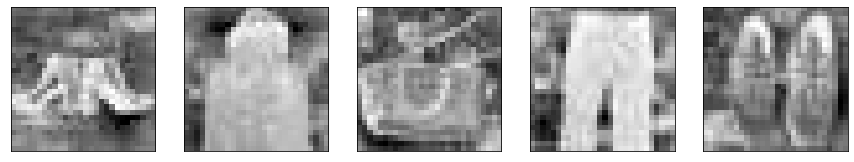

In [164]:
list_image=[]
list_image.append(gs1)
list_image.append(gs2)
list_image.append(gs3)
list_image.append(gs4)
list_image.append(gs5)
fig, ax=plt.subplots(1,5,figsize=(15,15))
for i, axi in enumerate(ax.flat):
    axi.imshow(list_image[i], cmap=plt.cm.binary)
    axi.set(xticks=[],yticks=[])

## <span style="color: darkmagenta"> Building Predictive Models with Neural Networks and CNN </span>

In [146]:
# Data preprocessing
new_img = np.array(list_image)
new_img.shape

(5, 28, 28)

In [149]:
# Principal component analysis, normalization and reshaping
image=new_img.reshape(5,28*28)
print("Image Shape is:",image.shape)
print()
data_pca = pca.transform(image)
print("PCA selected features are:",data_pca.shape)

Image Shape is: (5, 784)

PCA selected features are: (5, 375)


The Predicted label of the image is : Bag


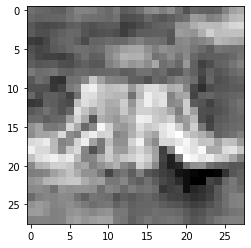

The Predicted label of the image is : Bag


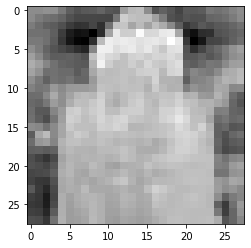

The Predicted label of the image is : Bag


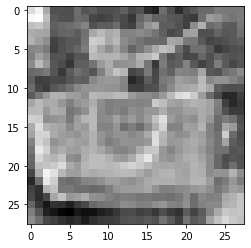

The Predicted label of the image is : Bag


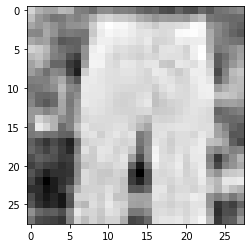

The Predicted label of the image is : Bag


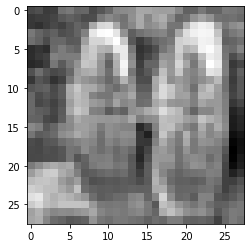

In [154]:
# Predicting classe_labels of Images using Neural Networks and checking accuracy of the images
neural_network =nk.predict(data_pca)
i=0
for i in range(5):   
    acc_image = image[i]
    res_image = acc_image.reshape(28,28)
    plt.imshow(res_image ,cmap='binary')
    label = neural_network[i]   
    print("The Predicted label of the image is :", class_names[label])  
    i=i+1
    plt.show()

The Predicted label of the image is : Shirt


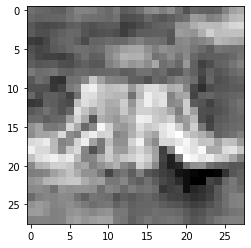

The Predicted label of the image is : Bag


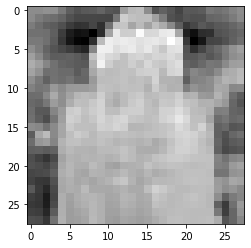

The Predicted label of the image is : Bag


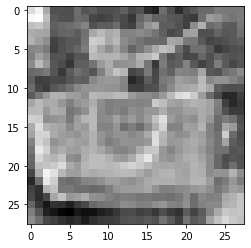

The Predicted label of the image is : Shirt


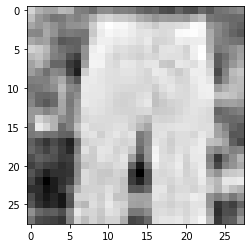

The Predicted label of the image is : Shirt


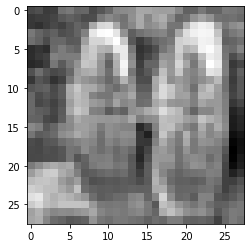

In [167]:
# Predicting classe_labels of Images using CNN and checking accuracy of the images

# Data preprocessing
new_img = np.array(list_image)
new_img.shape
image=new_img.reshape(5,28,28,1)

# Prediction using CNN
predictions_cnn = model.predict(image)

i=0
for i in range(5):   
    acc_image = image[i]
    res_image = acc_image.reshape(28,28)
    plt.imshow(res_image ,cmap='binary')
    label = np.argmax(predictions_cnn[i])
    print("The Predicted label of the image is :", class_names[label])  
    i=i+1
    plt.show()

## <span style="color: darkgreen"> OVERALL INTERPRETATION :Although while training the Fashion MNIST dataset with Neural Networks and CNN models the prediction accuracy was pretty high, however the 5 fashion object images labels (resized, grayscaled and reshaped) where misclassified by the same Neural Networks and CNN Models. The reason could be the background of the images , in the future if this is taken in consideration an improved prediction could be acheived with Neural Networks.  </span>

Now, it's your turn,

<ul>
    <li><b>Task1:</b> Use the train set to train various supervised models and evaluate their performance using the test set.</li>
    <ul>
        <li>Use different supervised learning models.</li>
        <li>Use different metrics such as <b>accutacy</b>, <b>precision</b>, <b>AUC</b>, and ... in your model evaluation. </li>
        <li>It is not enough to report the metrics. It is crucial that you interpret the metrics for each model and compare them across different models.</li>
        <li> You may need to use the cross validation methods for hyperparameter selection.</li>
        <li> Specify the model that outperforms the other models.</b>
    </ul>
    <li><b>Task2:</b> Use the best model to predict your own fashion pieces.</li>
    <ul>
        <li>Take a picture of five fashion pieces of your own (take pictures in square format).</li>
        <li>Resize images to the correct size (28,28).</li>
        <li>Grayscale your images.</li>
        <li>Visualize all the images side by side</li>
        <li>Use the best model in Task 1 to predict the label of each of your own images.</li>
        <li>How accurate is the final result?</li>
    </ul>
</ul>

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final work should be very well structured and should have a consistent flow of analysis.</li>
</ul>

#### Due Date: Nov 15 2021 at 11:59 PM

## Grading Criteria

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Innovation (Extra)</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">110%</b></td>
    </tr>
</table>